In [4]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.15.0


In [5]:
# categories a set of data points to a discrete class based on a linear combination of its explanatory variables
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

The above generates 2 sets of data points. `negative_samples` and `positive samples` are data points that follow a bivariate normal distribution, where mean and variance are passed as model parameters. Covariance is set to 1 as we are constructing sample data that has a linear relationship. 

[[Var(X), Cov(X, Y)],
 [Cov(Y, X), Var(Y)]]

 Is the form of the covariance matrix being passed. Same applies for higher dimensions. 

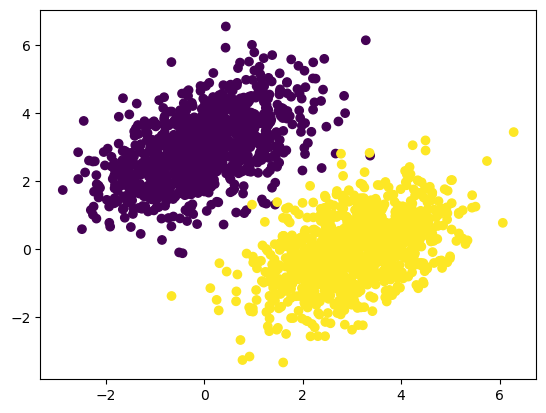

In [6]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32) 

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0]) 
plt.show() # shows targets 

Above is plot of the data set after stacking them together.

In [7]:

# weights 
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim))) 
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(inputs):
  return tf.matmul(inputs, W) + b 

2024-02-02 16:05:47.600438: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-02-02 16:05:47.600525: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-02 16:05:47.600555: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-02 16:05:47.601086: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-02 16:05:47.601667: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


The above creates model weights. `inputs` is a 2000x2 tensor. As we are building a classification model, we want the output tensor to be 2000x1. So, we need `W` to be a 2x1 tensor. `b` is a scalar (broadcasted to element-wise).

In [8]:
# loss function
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions) 
  return tf.reduce_mean(per_sample_losses) 

The above is the loss function. `square_loss` function is a standard loss function. We perform element-wise squaring on the differecne. This way, errors become "amplified", and we remove negatives (as we don't really care about negatives, only that it has a loss value). We then get the mean over all values in the tensor and return it.

In [9]:
# training step function 
learning_rate = 0.1

def training_step(inputs, targets): 
  with tf.GradientTape() as tape: 
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) # find gradient for both W and b, for both tensors 
  W.assign_sub(grad_loss_wrt_W * learning_rate) # we take that direction, multiply by learning rate, and minus it from the tensor, this updates the weights of this layer 
  b.assign_sub(grad_loss_wrt_b * learning_rate)

  return loss

This is the training step. Gradient of the model function is computed, to training step, move `W` and `b` in the opposite direction of the gradient (as gradient direction is that of largest increase/incline) with respect to the learning rate. Finally, to evaluate effectiveness of this model:

Loss at step 0: 4.0288
Loss at step 1: 0.6014
Loss at step 2: 0.1969
Loss at step 3: 0.1400
Loss at step 4: 0.1251
Loss at step 5: 0.1160
Loss at step 6: 0.1081
Loss at step 7: 0.1010
Loss at step 8: 0.0945
Loss at step 9: 0.0885
Loss at step 10: 0.0831
Loss at step 11: 0.0781
Loss at step 12: 0.0736
Loss at step 13: 0.0694
Loss at step 14: 0.0656
Loss at step 15: 0.0621
Loss at step 16: 0.0589
Loss at step 17: 0.0560
Loss at step 18: 0.0534
Loss at step 19: 0.0509
Loss at step 20: 0.0487
Loss at step 21: 0.0467
Loss at step 22: 0.0448
Loss at step 23: 0.0431
Loss at step 24: 0.0416
Loss at step 25: 0.0401
Loss at step 26: 0.0388
Loss at step 27: 0.0377
Loss at step 28: 0.0366
Loss at step 29: 0.0356
Loss at step 30: 0.0347
Loss at step 31: 0.0338
Loss at step 32: 0.0331
Loss at step 33: 0.0324
Loss at step 34: 0.0317
Loss at step 35: 0.0312
Loss at step 36: 0.0306
Loss at step 37: 0.0301
Loss at step 38: 0.0297
Loss at step 39: 0.0293


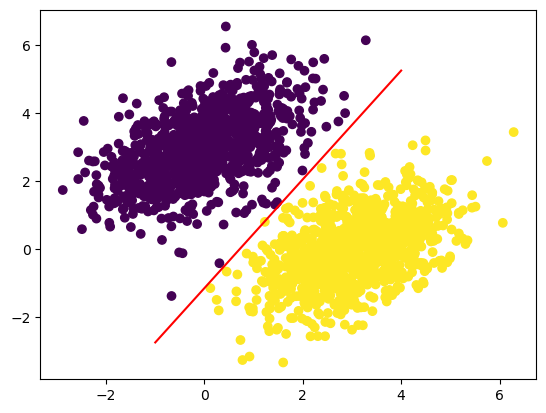

In [10]:

for step in range(40):
  loss = training_step(inputs, targets) 
  print(f"Loss at step {step}: {loss:.4f}") # this shows us the loss for 40 iteratons. We can see it slows down to around 0.027
  
# preidctions (naive way)
predictions = model(inputs)
x = np.linspace(-1, 4, 100)
y=-W[0]/ W[1]*x+(0.5-b)/W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)